In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:\\Users\\arman\\Downloads\\Data mining\\archive\\ObesityDataSet_raw_and_data_sinthetic.csv')


In [3]:
df.shape

(2111, 17)

In [4]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Missing values

In [5]:
# Checking missing values
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()


Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


Duplicates

In [6]:
# Checking for duplicate rows
print(df.duplicated().sum())


24


In [7]:
df = df.drop_duplicates(keep='last')


In [8]:
df.drop(columns=['MTRANS'], inplace=True)


In [9]:
binary_cols = ['Gender', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight']
df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0, 'Male': 1, 'Female': 0})


C:\Users\arman\AppData\Local\Temp\ipykernel_17700\127468874.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0, 'Male': 1, 'Female': 0})


In [10]:
caec_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
calc_mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2}

df['CAEC'] = df['CAEC'].map(caec_mapping)
df['CALC'] = df['CALC'].map(calc_mapping)


In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['NObeyesdad'] = encoder.fit_transform(df['NObeyesdad'])


In [12]:
print(dict(enumerate(encoder.classes_)))


{0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Level_II'}


In [13]:
print(df.head())


    Age  Gender  Height  Weight  CALC  FAVC  FCVC  NCP  SCC  SMOKE  CH2O  \
0  21.0       0    1.62    64.0   0.0     0   2.0  3.0    0      0   2.0   
1  21.0       0    1.52    56.0   1.0     0   3.0  3.0    1      1   3.0   
2  23.0       1    1.80    77.0   2.0     0   2.0  3.0    0      0   2.0   
3  27.0       1    1.80    87.0   2.0     0   3.0  3.0    0      0   2.0   
4  22.0       1    1.78    89.8   1.0     0   2.0  1.0    0      0   2.0   

   family_history_with_overweight  FAF  TUE  CAEC  NObeyesdad  
0                               1  0.0  1.0     1           1  
1                               1  3.0  0.0     1           1  
2                               1  2.0  1.0     1           1  
3                               0  2.0  0.0     1           5  
4                               0  0.0  0.0     1           6  


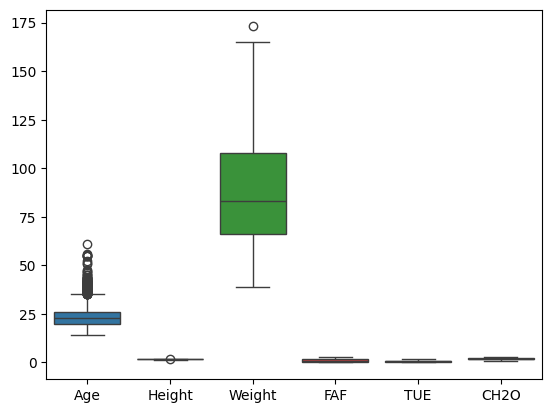

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data=df[['Age', 'Height', 'Weight', 'FAF', 'TUE', 'CH2O']])
plt.show()


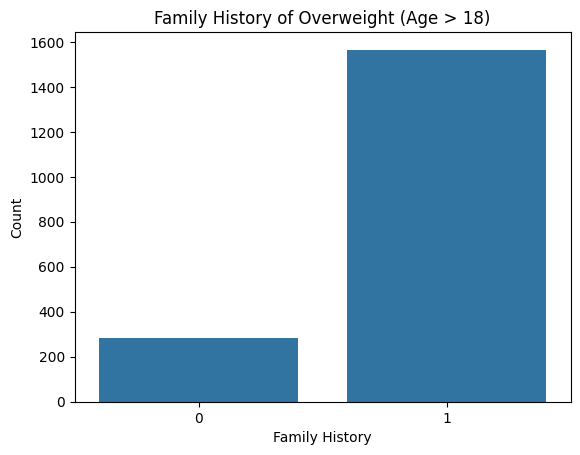

In [15]:
sns.countplot(data=df[df['Age'] > 18], x='family_history_with_overweight')
plt.title('Family History of Overweight (Age > 18)')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.show()



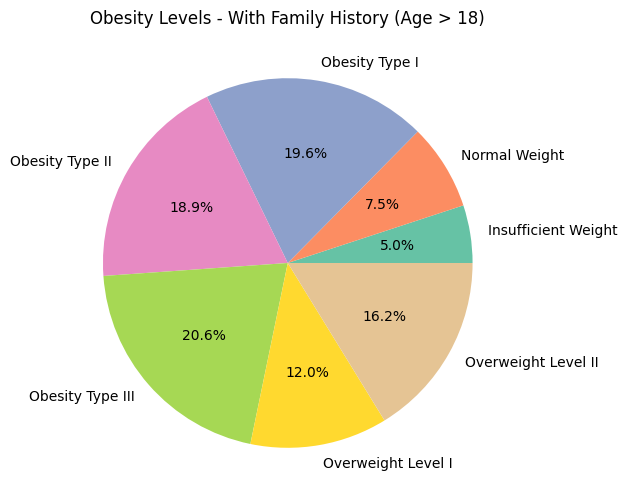

In [16]:
import matplotlib.pyplot as plt

# obesity levels
labels = ['Insufficient Weight', 'Normal Weight', 'Obesity Type I', 'Obesity Type II', 
          'Obesity Type III', 'Overweight Level I', 'Overweight Level II']

# Filter
filtered_df = df[(df['family_history_with_overweight'] == 1) & (df['Age'] > 18)]

yes_counts = filtered_df['NObeyesdad'].value_counts(normalize=True) * 100

yes_counts = yes_counts.reindex(range(7), fill_value=0)

# Plot
plt.figure(figsize=(6, 6))
plt.pie(yes_counts, labels=labels, autopct='%1.1f%%', colors=plt.cm.Set2.colors)
plt.title("Obesity Levels - With Family History (Age > 18)")
plt.show()


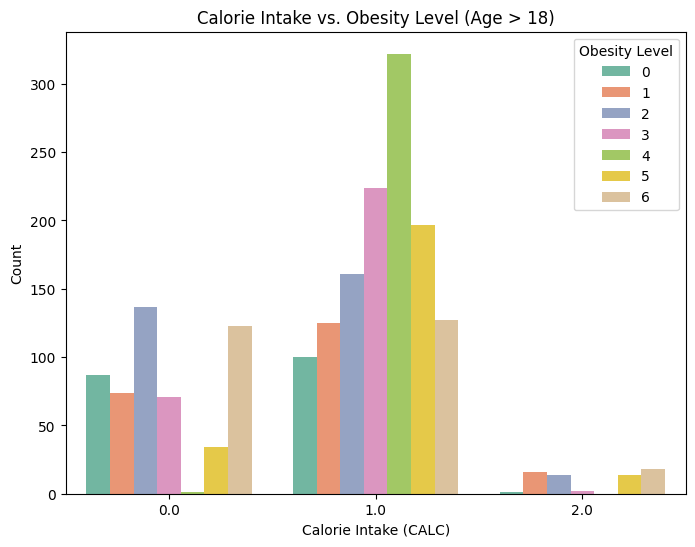

In [17]:
df_over18 = df[df['Age'] > 18]

plt.figure(figsize=(8, 6))
sns.countplot(data=df_over18, x='CALC', hue='NObeyesdad', palette='Set2')
plt.title('Calorie Intake vs. Obesity Level (Age > 18)')
plt.xlabel('Calorie Intake (CALC)')
plt.ylabel('Count')
plt.legend(title='Obesity Level', loc='upper right')
plt.show()



C:\Users\arman\AppData\Local\Temp\ipykernel_17700\717584243.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_over18, x='NObeyesdad', y='FAF', palette='Set2')


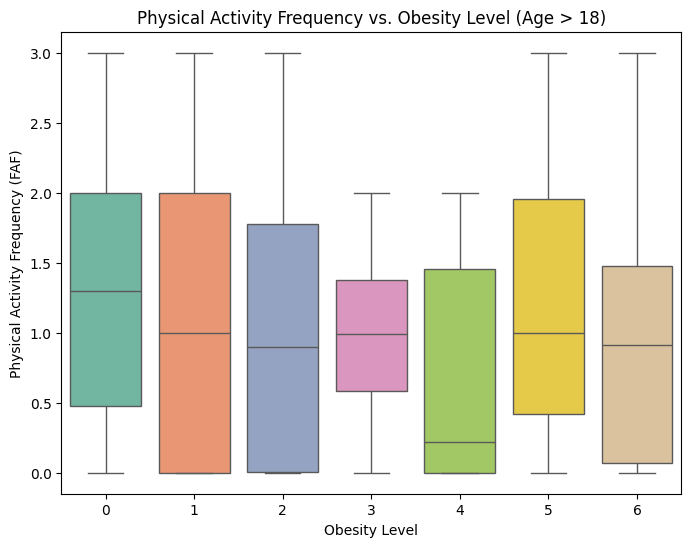

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_over18, x='NObeyesdad', y='FAF', palette='Set2')
plt.title('Physical Activity Frequency vs. Obesity Level (Age > 18)')
plt.xlabel('Obesity Level')
plt.ylabel('Physical Activity Frequency (FAF)')
plt.show()
